# 1. Introduction
Stock prediction plays a crucial role in market timing strategies, helping investors identify stocks or securities likely to appreciate in value and exit positions in those expected to decline. Currently, fundamental analysis, technical analysis, and hybrid approaches are valuable tools in this endeavor. However, a significant challenge lies in the accuracy of these predictions, given the rapidly changing and dynamic nature of financial markets.

In this project, I aim to address the problem through machine leaning and deep learning-based techinical analysis in building a robust, reliable and acurate modle. In particular, I applied machine leanrning-based models, ARIMA, as the bench mark. Followed by deep leaning-based models, LSTM, for time series forcasting. The evaluation matrix include RMSE and Backtesting is conducted.

# 2. Dataset

The Dataset is scraped from Yahoo Finance website through Yahoo Finance API.

Run "webscraper_cy.py" to get the follwoing csv data file:
1. AAPL
2. AMZN
3. GOOG
4. MSFT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.2 MB/s eta 0:00:00


In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#os.chdir('/content/drive/MyDrive/Database')
#!ls

In [4]:
# concatenated all the Adj. Close price data of above 4 companies to a single dataframe
path = '/content/drive/MyDrive/Database/'
stock = []
stock_price_dict = {}

for file in os.listdir(path):
  file_path = path + file
  df = pd.read_csv(file_path)
  df = df.set_index(pd.DatetimeIndex(df["Date"]))
  stock.append(file)
  stock_price_dict[file.split(".")[0]] = df['Adj Close']

stock_price_df = pd.DataFrame(stock_price_dict)
stock_price_df

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2000-01-03,0.848323,4.468750,NaN,36.205601
2000-01-04,0.776801,4.096875,NaN,34.982586
2000-01-05,0.788168,3.487500,NaN,35.351429
2000-01-06,0.719961,3.278125,NaN,34.167225
2000-01-07,0.754065,3.478125,NaN,34.613708
...,...,...,...,...
2023-10-02,173.750000,129.460007,135.169998,321.799988
2023-10-03,172.399994,124.720001,133.300003,313.390015
2023-10-04,173.660004,127.000000,136.270004,318.959991


# 3. Data Preprocessing

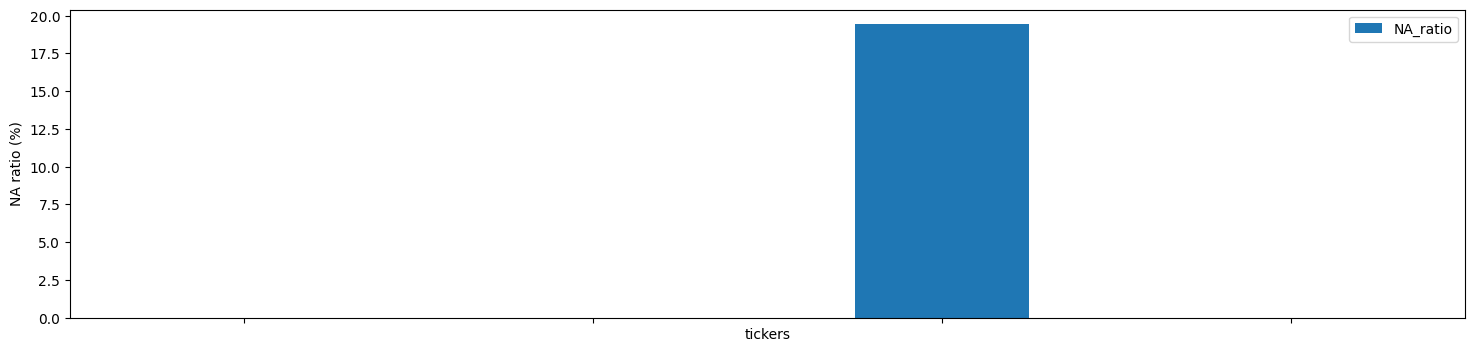

In [5]:
# Missing Data:
# Construct NA_df
NA_col = []
NA_ratio = []
for col in stock_price_df.columns:
  NA_col.append(col)
  NA_index = np.where(stock_price_df[col].isnull())[0]
  NA_ratio.append(len(NA_index)/ stock_price_df.shape[0] * 100)
NA_df = pd.DataFrame({"tickers":NA_col, "NA_ratio":NA_ratio})

# Visualize the missing data
NA_df.plot.bar(rot=0, figsize=(18,4))
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
plt.xlabel('tickers')
plt.ylabel('NA ratio (%)')
plt.show()
plt.close()

No Missing Data.
If there is missing data, uncomment following code

In [6]:
# Drop the colume if too many missing value
#stock_price_df = stock_price_df.drop(['xxx'], axis=1)

# For few missing point, Impute the data points with the data from the day right before
for col in stock_price_df.columns:
  NA_index = np.where(stock_price_df[col].isnull())[0]
  for i in NA_index:
     stock_price_df[col][i] = stock_price_df[col][i-1]
# Final Check for NaN
for item in stock_price_df.columns :
    if stock_price_df[item].isnull().values.any() :
        print('stock price data of '+item+' still has NaN')
print("END OF CHECKING. NO NA REMAINING")

END OF CHECKING. NO NA REMAINING


In [7]:
# Outlier
for col in stock_price_df.columns:
  q_low = stock_price_df[col].quantile(0.01)
  q_hi  = stock_price_df[col].quantile(0.99)
  df_filtered = stock_price_df[(stock_price_df[col] < q_hi) & (stock_price_df[col] > q_low)]

In [8]:
# Save Data
df_filtered.head()
stock_price_df.to_csv('/content/drive/MyDrive/FinalData/dataset.csv')
stock_price_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2000-01-03,0.848323,4.468750,138.729996,36.205601
2000-01-04,0.776801,4.096875,138.729996,34.982586
2000-01-05,0.788168,3.487500,138.729996,35.351429
2000-01-06,0.719961,3.278125,138.729996,34.167225
2000-01-07,0.754065,3.478125,138.729996,34.613708
